
## DATA 11800 (Section 1), Autumn 2023, University of Chicago

# Homework 3: Data Frames and Graphs  (50 points)


Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Canvas as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

Make sure to RUN ALL CELLS IN YOUR NOTEBOOK before submitting.  All of your answers should be printed and easy for graders to find if you want full credit for your work.


#### Deadline:

This assignment is due on **Friday, Oct 20 at 11:59pm**. Late work will not be accepted unless you have made special arrangements with the instructor.

Directly sharing answers is not okay, but discussing problems with the course staff is encouraged, and with other students is allowed.

You should start early so that you have time to get help if you're stuck.


In [102]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. CTA (20 points)

This exercise will look at a dataset from the Chicago Transit Authority, `CTA - Ridership - Daily Boarding Totals`, available from the Chicago Data Portal 
https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97 
and downloaded on October 10, 2023.

This is a 20-year timeseries of total bus and train utilization. The readme file on this dataset is here:
https://data.cityofchicago.org/api/assets/5175CFDE-CA9A-498C-BB1C-8A86B780CCF1

In [103]:
# specify the correct path to the file and run this
cta= pd.read_csv("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
cta.head(5)

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


In [104]:
# run this cell
type(cta.iloc[0,0])

str

As you see in the output of the above cell, the `service_date` entries are strings. The next cell converts the (string) dates into pandas.datetime format and assigns them to a new column called `Date`. We also show you how to extract the year from the `Date` column (you might need to extract other parts of the date so read the code carefully).

In [105]:
# run this cell
cta['Date']=pd.to_datetime(cta.service_date)
cta['Year'] = cta['Date'].dt.year
cta.tail(5)

,service_date,day_type,bus,rail_boardings,total_rides,Date,Year
8273,06/26/2023,W,445453,323554,769007,2023-06-26,2023
8274,06/27/2023,W,496729,395754,892483,2023-06-27,2023
8275,06/28/2023,W,496731,392034,888765,2023-06-28,2023
8276,06/29/2023,W,470303,393963,864266,2023-06-29,2023
8277,06/30/2023,W,473836,378120,851956,2023-06-30,2023


The `datetime` data format has other useful features with some more illustrated in the cell below for the last date in the dataset.


In [106]:
# run this cell
[cta.Date[8277].year,cta.Date[8277].month, cta.Date[8277].day, cta.Date[8277].dayofweek]

[2023, 6, 30, 4]

**Question 1 (3 pts)**. What period of time does the dataset cover (dates are ordered)? Calculate the number of days in that period. 

In [107]:
# calculation here
# Jan 1st, 2001 to June 30th, 2023
cta.Date.max() - cta.Date.min() # returns 8215
len(cta.Date.unique()) # returns 8216
# 8215 days not including the end date (june 30th, 2023), 8216 including that date.

8216

**Question 2 (2 pts)** How many rows does the dataset have?  Are any dates missing?


In [108]:
# code here
# Dataset has 8277 rows so there are repeat dates
cta.shape[0], len(cta.Date.unique())

(8278, 8216)

*Answer here:* There are 8278 rows in the dataset, however there are 8216 unique dates meaning that no date is missing, there just are some repeat dates.

**Question 3 (4 pts)** Generate a line plot of CTA total_rides for the **past five years** (since 01/01/2018).

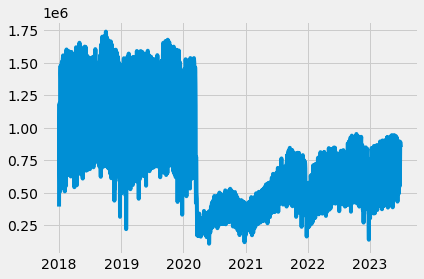

In [109]:
# code here
data = cta.loc[cta.Date.dt.year >= 2018].sort_values(by='Date')
plt.plot(data.Date.to_numpy(), data.total_rides.to_numpy())
plt.show()

**Question 4 (3 pts)** Compare total CTA ridership for the months of January in 2019 and 2023.
By approximately how much has ridership changed from 2019 to 2023? 

In [110]:
# code here
ridership_2019 = cta.loc[(cta.Date.dt.month == 1) & (cta.Date.dt.year == 2019)].total_rides.sum()
ridership_2023 = cta.loc[(cta.Date.dt.month == 1) & (cta.Date.dt.year == 2023)].total_rides.sum()
print(f"{ridership_2019} vs {ridership_2023}\nRidership in 2023 was ~{np.round(ridership_2023 / ridership_2019, 4) * 100}% of what it was in 2019")

33522713 vs 19871252
Ridership in 2023 was ~59.28% of what it was in 2019


**Question 5 (5 pts)** Make a scatter plot of train boardings vs. bus ridership.  Comment on the graph.  (What do you see?)  Make sure you add adequate labels. 

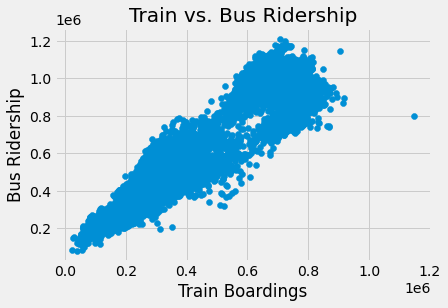

In [111]:
# code here
plt.scatter(cta.rail_boardings, cta.bus)
plt.xlabel('Train Boardings')
plt.ylabel('Bus Ridership')
plt.title("Train vs. Bus Ridership")
plt.show()

*Answer here:* There is a relatively strong positive linear correlation between train boardings and bus ridership. I.e. when more people are riding the train, more people are also riding the bus.

**Question 6 (3 pts)** Are there unusual days in the next plot (code provided below)? For the unusual days you find, provide an explanation.
                                                                                          

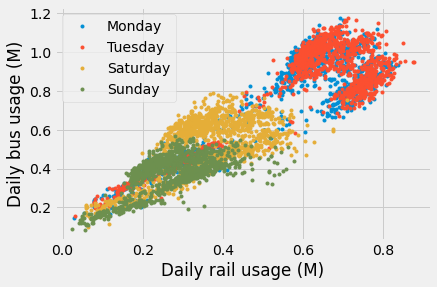

In [112]:
# run this cell
cta["dayofweek"] =cta['Date'].dt.dayofweek
dow = {0:"Monday", 1:"Tuesday", 5:"Saturday", 6:"Sunday"} 
for i in [0,1,5,6]: 
    r = (cta.dayofweek == i)
    plt.plot(cta.rail_boardings[r].to_numpy()/1E6, cta.bus[r].to_numpy()/1e6, '.', label = dow[i])
plt.legend()
plt.xlabel("Daily rail usage (M)")
plt.ylabel("Daily bus usage (M)");

In [113]:
# code (if needed) here


*Answer here:* On average Monday and Tuesday have a much higher bus and train usage than Saturday and Sunday most likely due to the usage of transportation to go to work for the majority of the population. However, there are some Mondays and Tuesdays which show low levels of transportation use which can most likely be attributed to holidays. There are some Saturday/Sundays with higher levels of transportation use which could be attributed to larger than usual events such as concerts or festivals taking place on those days.

## 2. Colleges (15 points)


This exercise uses data on colleges from Homework 2. Recall that the dataset was posted on Kaggle at the beginning of 2018, and was grabbed from US-News: https://www.usnews.com. It includes statistics for 311 US Universities. 

To make your tasks easiear, we removed many of the columns and kept only 11. The corresponding file can be found here:

http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv


#### Run the next cell that contains code that will allow you to read the data into a data frame called `colleges_df`. It also shows the first 10 rows.


In [114]:
# Just run this cell.

colleges_df=pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv')
colleges_df.head(10)

,act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,100.0,60.0,16793.0,47140,Princeton University,1,private
1,32.0,1430.0,6710.0,5.0,98.0,55.0,16338.0,48949,Harvard University,2,private
2,32.0,1450.0,5941.0,8.0,96.0,42.0,27767.0,54825,University of Chicago,3,private
3,32.0,1420.0,5472.0,6.0,96.0,50.0,18385.0,51400,Yale University,3,private
4,32.0,1430.0,6113.0,6.0,95.0,48.0,21041.0,57208,Columbia University,5,private
5,33.0,1460.0,4524.0,8.0,95.0,58.0,20331.0,49892,Massachusetts Institute of Technology,5,private
6,31.0,1380.0,7034.0,5.0,95.0,47.0,19296.0,49617,Stanford University,5,private
7,32.0,1380.0,10019.0,9.0,93.0,47.0,25441.0,53534,University of Pennsylvania,8,private
8,31.0,1380.0,6609.0,11.0,92.0,41.0,23374.0,53744,Duke University,9,private
9,34.0,1510.0,979.0,8.0,91.0,51.0,23973.0,49908,California Institute of Technology,10,private


**Run the following command that will make a scatterplot of SAT average scores (x-axis) and tuition (y-axis).**

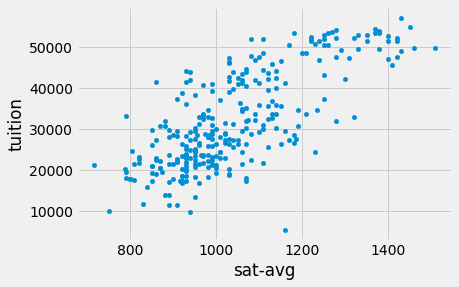

In [115]:
# run this cell
colleges_df.plot.scatter(x='sat-avg',y='tuition');

**Question 1 (2 pts).**  Describe in few words the pattern you see. What is a possible explanation for this pattern?

There is a relatively weak positive linear correlation between average SAT score and tuition. This could be due to state universities being on average larger universities with less stringent admissions screening from an academic standing and having lower tuition as they recieve state funding. Many of the most academically prestigious universities are private and therefore have higher tuition alongside attracting those with more of a focus on academics, therefore having students with generally higher SAT scores and having overall a higher average SAT. Additionally, many of the prestigious private universities offer more generous aid to students, thus requiring higher tuition for full-paying students to compensate.

**Question 2 (3 pts).** Draw a scatterplot of SAT average (x-axis) and 'cost-after-aid' (y-axis) and then describe the pattern you see. Provide an explanation for this pattern.

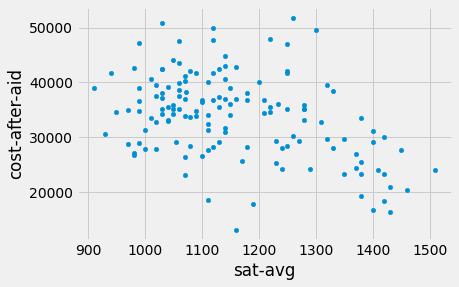

In [116]:
# use this cell for the code that will draw the scatterplot
colleges_df.plot.scatter(x='sat-avg',y='cost-after-aid');


There is a weak negative correlation between the average sat and the average cost after aid. The cost after aid tends to be lower at schools with higher sat averages. This is most likely due to more prestigious universities (with higher average SATs) having bigger endowments and higher tuition and are therefore able to offer more generous aid (lowering cost after aid).

**Question 3 (3 pts).** Construct a data frame that contains the colleges for which 'percent-receiving-aid' is greater than 0. Call this data frame `aid_df`.

Note that this dataset has missing data points (for example, not all colleges report the percentage of students who receive aid), and the table you created has eliminated the colleges with no information on aid.

In [117]:
aid_df = colleges_df.loc[colleges_df['percent-receiving-aid'] > 0]
aid_df



,act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,100.0,60.0,16793.0,47140,Princeton University,1,private
1,32.0,1430.0,6710.0,5.0,98.0,55.0,16338.0,48949,Harvard University,2,private
2,32.0,1450.0,5941.0,8.0,96.0,42.0,27767.0,54825,University of Chicago,3,private
3,32.0,1420.0,5472.0,6.0,96.0,50.0,18385.0,51400,Yale University,3,private
4,32.0,1430.0,6113.0,6.0,95.0,48.0,21041.0,57208,Columbia University,5,private
...,...,...,...,...,...,...,...,...,...,...,...
145,22.0,990.0,25327.0,77.0,41.0,34.0,36636.0,29457,Oregon State University,145,public
146,22.0,970.0,2786.0,65.0,41.0,81.0,28750.0,33120,St. John Fisher College,145,private
147,21.0,990.0,17959.0,74.0,41.0,31.0,39033.0,27672,University of Illinois--Chicago,145,public
148,22.0,1000.0,19213.0,78.0,41.0,24.0,27943.0,23554,University of Mississippi,145,public


**Question 4 (3 pts).**  Calculate the proportion of students who receive aid in private universities. Similarly calculate the proportion of students who receive aid in public universities. (Hint: the answer will not come from directly averaging  the 'percent-receiving-aid' column)

In [118]:
# use this cell to write the code that will output the two numbers
def get_aid_prop(typ: str):
    aid = aid_df.loc[aid_df.institutionalControl == typ]
    tot = aid.enrollment.sum()
    tot_aid = (aid.enrollment * (aid['percent-receiving-aid'] / 100)).sum()
    return f"{np.round(tot_aid / tot, 4) * 100}% of students at {typ} universities receive aid."

print(get_aid_prop('private'))
print(get_aid_prop('public'))

46.22% of students at private universities receive aid.
21.93% of students at public universities receive aid.


**Question 5 (2 pts).** Construct a data frame with two rows (for private and public) and two columns: (i) first column should contain the strings 'public' and 'private'; (ii) second column should contain the percent of students receiving aid that you calculated in Question 4.

In [129]:
# code for constructing the data frame
aid_prop_data = [(typ, float(get_aid_prop(typ)[:5])) for typ in ('private', 'public')]
aid_prop_df = pd.DataFrame(aid_prop_data, columns=["Institutional Control", "Percent of Students Recieving Aid"])
aid_prop_df

,Institutional Control,Percent of Students Recieving Aid
0,private,46.22
1,public,21.93


**Question 6 (2 pts).** Make a bar chart that shows the aid information in the table you created for  Question 5.

**Note:** Graphs aren't very useful without accurate labels.  

<AxesSubplot:xlabel='Institutional Control'>

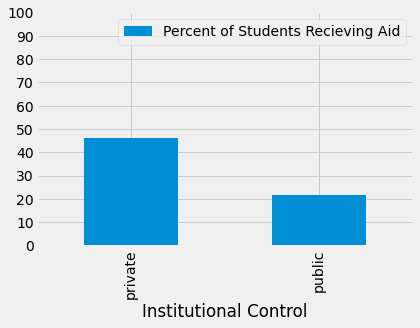

In [138]:
# the bar chart
aid_prop_df_g = aid_prop_df.set_index('Institutional Control')
aid_prop_df_g.plot(kind='bar', yticks=range(0, 101, 10))

## 3. Seattle Public Library Circulation (15 points)
For this exercise we use a dataset, dating to 2005, of titles checked out at the Seattle Public Library. Since this dataset is voluminous, we have taken a random sample of 1/1000 of the data without replacement.   This dataset is distrubted from the Seattle Open Data Portal: 
https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6

You can read about the origin of the dataset in [Walsh, Melanie "Where is all the Book Data?"]( https://www.publicbooks.org/where-is-all-the-book-data/) at publicbooks.org.

In [139]:
spl_df= pd.read_csv("http://www.stat.uchicago.edu/~nicolae/118/Checkouts.sample.csv")
spl_df.head(5)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,VIDEODISC,2016,4,1,"JammX kids. Adventure one, Can't dance don't w...",NaN,NaN,"Dance parties Juvenile drama, Hip hop Juvenile...",Lightforce Entertainment ; Distributed by Warn...,2006.
1,Digital,Hoopla,TELEVISION,2016,4,2,Dogs Decoded,NaN,NaN,Science,PBS,NaN
2,Digital,OverDrive,EBOOK,2016,4,1,"Hunter's Oath: Sacred Hunt Series, Book 1",NaN,Michelle West,"Fantasy, Fiction","Penguin Group (USA), Inc.",2013
3,Physical,Horizon,SOUNDDISC,2016,4,2,Arkology [sound recording] / [Lee Scratch Perry].,NaN,"Perry, Lee, 1936-",Reggae music,"Island Jamaica,",p1997.
4,Digital,OverDrive,EBOOK,2016,4,1,The Art of Eating In: How I Learned to Stop Sp...,NaN,Cathy Erway,"Cooking & Food, Essays, Nonfiction","Penguin Group (USA), Inc.",2010


**Question 1 (5 pts).**  Make a bar chart of the total number of items checked out by year (here we count number of items, so the entry in second row is counted once). Comment on the values in 2005, 2020, and 2022.

In [145]:
# code here
def get_year_items(year: int):
    return spl_df.loc[spl_df.CheckoutYear == year].shape[0]
print({yr: get_year_items(yr) for yr in (2005, 2020, 2022)})
print("Over time the total number of items checked out by year has risen as\nconsumers purchased a wider range of items in 2020 vs in 2005 and in 2022 vs 2020.")

{2005: 1366, 2020: 1698, 2022: 1907}
Over time the total number of items checked out by year has risen as
consumers purchased a wider range of items in 2020 vs in 2005 and in 2022 vs 2020.


**Question 2 (5 pts).** How did the pandemic interact with long-term trends in library / media 
consumption?  Using the data in the column `UsageClass` make a line graph plot that has two line trends, one for "DIGITAL" and one for "PHYSICAL". Comment on the trends you see in the graph. 	

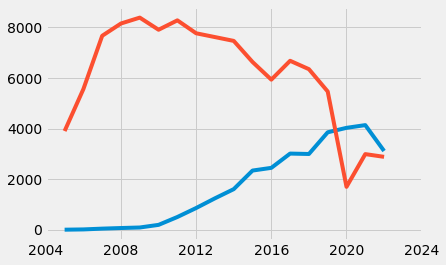

In [170]:
# code here
def get_trend(typ: str):
    return spl_df.loc[spl_df.UsageClass == typ].groupby(['CheckoutYear'])['Checkouts'].sum()

plt.plot(get_trend('Digital'))
plt.plot(get_trend('Physical'))
plt.xticks(range(2004, 2025, 4))
plt.show()

*Answer here:* Generally, over time checkouts for digital goods have risen while checkouts for physical goods continued to fall. During the Pandemic there was an original plummet in physical goods bought before leveling out post pandemic. Digital goods did not experience a severe increase during the pandemic but did see a decrease after the pandemic.

**Question 3 (5 pts).** We would like to see if there is some clarification on the trends in Question 2 that come from the data in column `MaterialType`. Make a line graph of BOOK, AUDIOBOOK, EBOOK, and VIDEODISK checkouts and comment on the general trends in the graph.

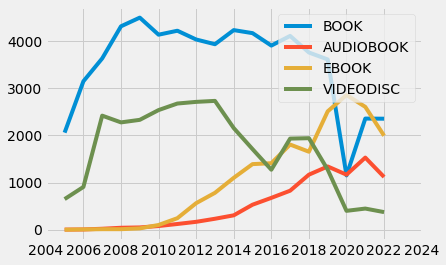

In [181]:
# code here
for mat in ('BOOK', 'AUDIOBOOK', 'EBOOK', 'VIDEODISC'):
    data = spl_df.loc[spl_df.MaterialType == mat].groupby(['CheckoutYear'])['Checkouts'].sum()
    plt.plot(data, label=mat)

plt.legend()
plt.xticks(range(2004, 2025, 2))
plt.show()

*Answer here:* Books and videodiscs (both physical goods) saw a severe dip in checkouts during the pandemic although books recovered a bit after. Audiobooks saw little impact from the pandemic and ebooks saw a strong increase in their checkouts. Overall these goods followed the previously observed pattern of physical goods decreasing in demand during the pandemic.